# Práctica 1 Pregunta 2: Clasificación usando todas las características de los datos

Usando todas las características, implementa los métodos Logistic Regression, SVM y Random Trees para clasificar los datos. Describe en el informe los parámetros usados y los resultados obtenidos con los distintos métodos y deposita el código Python en Aula Virtual en el fichero 'answer2.ipynb'.

## Importación de bibliotecas para análisis de datos y escalado

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Carga del dataset desde un archivo CSV

In [23]:
dataset = pd.read_csv("dataset.csv")

## Anonimización y análisis de la correlación del dataset

In [24]:
dataset_all_characteristics = dataset.drop(["Target"], axis=1)
dataset_all_characteristics.to_csv('dataset_all_characteristics.csv', index=False)
dataset_all_characteristics.corr()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11
Col1,1.000000,0.022026,0.234937,0.076470,-0.260987,0.061298,-0.202288,-0.010504,-0.256131,0.001918,-0.552496
Col2,0.022026,1.000000,-0.341699,0.071269,0.148506,0.200632,-0.496180,-0.021946,0.668047,0.355283,0.364947
Col3,0.234937,-0.341699,1.000000,-0.066495,-0.196648,-0.265026,0.205633,0.070377,-0.682978,-0.085652,-0.541904
Col4,0.076470,0.071269,-0.066495,1.000000,0.042947,0.047400,-0.205654,0.667666,-0.113181,0.203028,0.035533
Col5,-0.260987,0.148506,-0.196648,0.042947,1.000000,0.371260,0.093595,0.051658,0.183006,0.005527,0.312770
Col6,0.061298,0.200632,-0.265026,0.047400,0.371260,1.000000,-0.221141,0.005562,0.093705,0.055610,0.203823
Col7,-0.202288,-0.496180,0.205633,-0.205654,0.093595,-0.221141,1.000000,-0.069408,-0.061668,0.042075,0.109903
Col8,-0.010504,-0.021946,0.070377,0.667666,0.051658,0.005562,-0.069408,1.000000,-0.153794,0.187049,-0.060978
Col9,-0.256131,0.668047,-0.682978,-0.113181,0.183006,0.093705,-0.061668,-0.153794,1.000000,0.114777,0.671703
Col10,0.001918,0.355283,-0.085652,0.203028,0.005527,0.055610,0.042075,0.187049,0.114777,1.000000,0.143577


## Separación de características y etiquetas del dataset

In [25]:
X = dataset_all_characteristics
y = dataset.get("Target")
print('Class labels:', np.unique(y))

Class labels: [3 4 5 6 7 8]


## División del dataset en entrenamiento (75%) y prueba (25%)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.25, random_state=1, stratify=y)

## Estandarización del balance de clases

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Entrenamiento y evaluación del modelo por regresión logística (Logistic Regression)

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('Misclassification samples: %d' % (y_test != y_pred).sum())
print(y_test != y_pred)
print('Accuracy: %.3f' % lr.score(X_test_std, y_test))

/home/aalberto/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Misclassification samples: 165
530      True
1424    False
903      True
1382     True
587      True
        ...  
675     False
1510     True
1002    False
969      True
52      False
Name: Target, Length: 400, dtype: bool
Accuracy: 0.588


## Entrenamiento y evaluación del modelo por máquinas de soporte vectorial (SVM)

In [29]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=1, gamma=0.7, C=30.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassification samples: %d' % (y_test != y_pred).sum())
print(y_test != y_pred)
print('Accuracy: %.3f' % svm.score(X_test_std, y_test))

Misclassification samples: 157
530     False
1424     True
903      True
1382     True
587      True
        ...  
675     False
1510     True
1002    False
969      True
52      False
Name: Target, Length: 400, dtype: bool
Accuracy: 0.608


## Entrenamiento y evaluación del modelo por árboles de decisión (Random Trees)

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

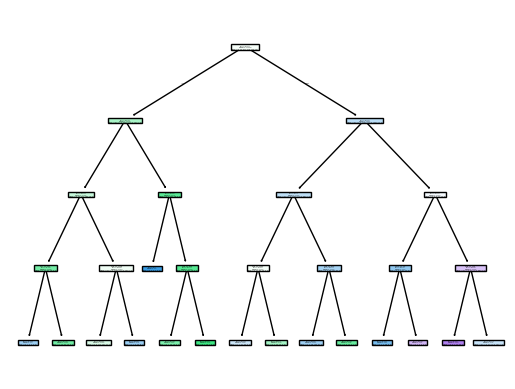

Misclassification samples: 172
530     False
1424    False
903      True
1382     True
587     False
        ...  
675     False
1510     True
1002     True
969      True
52      False
Name: Target, Length: 400, dtype: bool
Accuracy: 0.570


In [31]:
from sklearn import tree
feature_names = ['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10', 'Col11']
tree.plot_tree(tree_model,
               feature_names=feature_names,
               filled=True)
plt.show()
y_pred = tree_model.predict(X_test)
print('Misclassification samples: %d' % (y_test != y_pred).sum())
print(y_test != y_pred)
print('Accuracy: %.3f' % tree_model.score(X_test, y_test))

## Conversión de Jupyter Notebook en un archivo Python

In [32]:
! python .convert_notebook_to_script.py --input answer2.ipynb --output answer2.py

[NbConvertApp] Converting notebook answer2.ipynb to script
[NbConvertApp] Writing 3465 bytes to answer2.py
